In [ ]:
from bliss.grid import shift_sources_in_ptiles

import matplotlib.pyplot as plt
from astropy.table import Table
from bliss.datasets.table_utils import column_to_tensor
from bliss.datasets.lsst import get_default_lsst_psf
from bliss.datasets.generate_blends import generate_dataset
from bliss.datasets.render_utils import render_one_galaxy, sample_galaxy_params

import torch

In [ ]:
# prepare bigger dataset
catsim_table = Table.read("../../../data/OneDegSq.fits")
all_star_mags = column_to_tensor(Table.read("../../../data/stars_med_june2018.fits"), "i_ab")
psf = get_default_lsst_psf()
new_table = catsim_table[catsim_table['i_ab'] < 23]

n_samples = 6

In [ ]:
gparams = sample_galaxy_params(new_table, 6, 6)
gparams.shape

torch.Size([6, 10])

In [ ]:
# makes tiles of 53x53
ptiles = [render_one_galaxy(gparam, psf, 53) for gparam in gparams]
ptiles = torch.cat(ptiles, axis=0)
ptiles.shape

torch.Size([6, 53, 53])

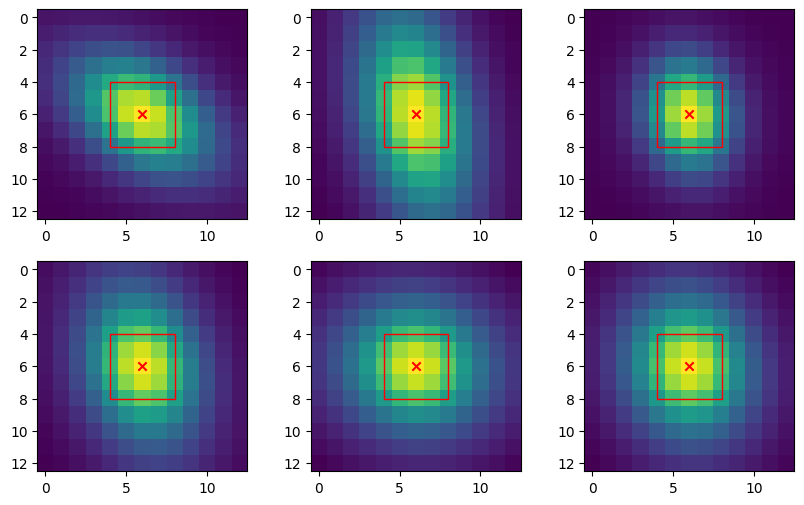

In [ ]:
import matplotlib.patches as patches


# plot them , all should be centered in central pixel
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
trim = 20
for ii, ax in enumerate(axes.flat):
    ax.imshow(ptiles[ii, trim:-trim, trim:-trim].numpy(), interpolation='none')

    ax.scatter(53/2-0.5-trim, 53/2-0.5-trim, color='r', marker='x')

    # square of 4 pixels centered (not possible!, odd image), so not aligned with pixels
    rect = patches.Rectangle((53/2-0.5-2-trim, 53/2-0.5-2-trim), 4, 4, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

In [ ]:
# now let's try shifting these images by some locs using the `shift_sources_in_ptiles`
# we will also make the `shift_sources_in_ptiles` function 
input_ptiles = ptiles.reshape(6, 1, -1, 53)
locs = torch.zeros((6, 2)) + 0
out_ptiles = shift_sources_in_ptiles(input_ptiles, locs, 4, 52, center=False)
out_ptiles.shape

torch.Size([6, 1, 52, 52])

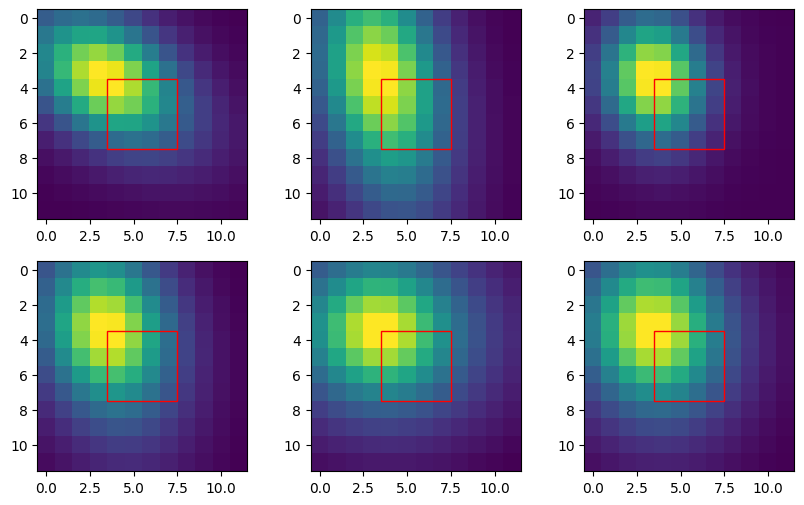

In [ ]:
# plot them , all should be centered in central pixel
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
trim = 20
for ii, ax in enumerate(axes.flat):
    ax.imshow(out_ptiles[ii, 0, trim:-trim, trim:-trim].numpy(), interpolation='none')

    # ax.scatter(52/2-0.5-trim, 52/2-0.5-trim, color='r', marker='x')

    # square of 4 pixels centered
    rect = patches.Rectangle((25.5-2-trim, 25.5-2-trim), 4, 4, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

In [ ]:
# now shift them back and replot
locs = torch.zeros((6, 2)) + 0
out_ptiles2 = shift_sources_in_ptiles(out_ptiles, locs, 4, 52, center=True)
out_ptiles2.shape

torch.Size([6, 1, 52, 52])

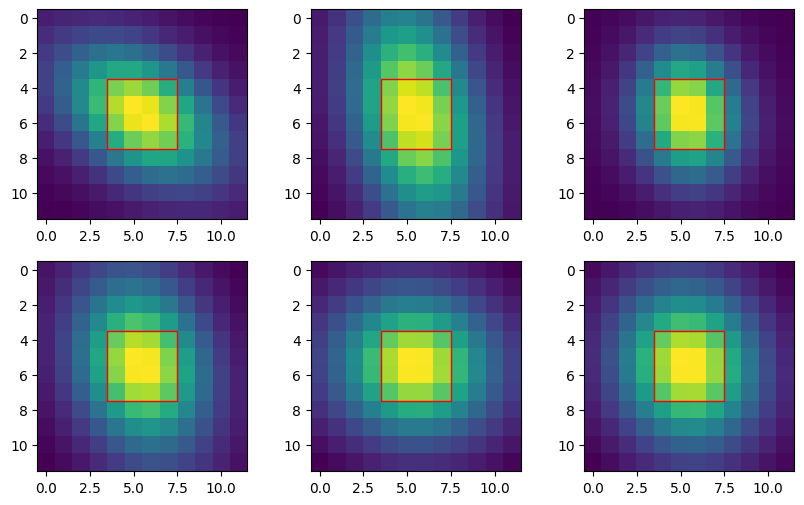

In [ ]:
# plot them , all should be centered in central pixel
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
trim = 20
for ii, ax in enumerate(axes.flat):
    ax.imshow(out_ptiles2[ii, 0, trim:-trim, trim:-trim].numpy(), interpolation='none')

    # ax.scatter(52/2-0.5-trim, 52/2-0.5-trim, color='r', marker='x')

    # square of 4 pixels centered
    rect = patches.Rectangle((25.5-2-trim, 25.5-2-trim), 4, 4, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

In [ ]:
dataset = generate_dataset(n_samples, new_table, all_star_mags, psf, 1, 1000, 0, 4, 24

In [ ]:
# construct 6 ptiles with centered galaxies that are centered. 